In [1]:
###2)
import math

def estimate_population_mean(sample_mean, sample_std_dev, sample_size):
    """
    Estimate the population mean given a sample mean, sample standard deviation, and sample size.
    
    Parameters:
    - sample_mean: The mean of the sample.
    - sample_std_dev: The standard deviation of the sample.
    - sample_size: The size of the sample.
    
    Returns:
    - population_mean_estimate: The estimated population mean.
    """
    # Calculate the standard error of the mean (SEM)
    standard_error = sample_std_dev / math.sqrt(sample_size)
    
    # Calculate the margin of error
    # For a point estimate, you might choose a confidence level (e.g., 95%) and corresponding z-score
    # For a 95% confidence level, the z-score is approximately 1.96
    confidence_level_z_score = 1.96
    margin_of_error = confidence_level_z_score * standard_error
    
    # Calculate the interval estimate (confidence interval)
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    # The point estimate is the sample mean itself
    population_mean_estimate = sample_mean
    
    print(f"Point Estimate (Population Mean): {population_mean_estimate}")
    print(f"Confidence Interval: [{lower_bound}, {upper_bound}]")
    
    return population_mean_estimate

# Example usage:
sample_mean = 150  # Replace with your sample mean
sample_std_dev = 10  # Replace with your sample standard deviation
sample_size = 30  # Replace with your sample size

estimated_population_mean = estimate_population_mean(sample_mean, sample_std_dev, sample_size)


Point Estimate (Population Mean): 150
Confidence Interval: [146.4215459576329, 153.5784540423671]


In [2]:
###5)
import numpy as np
from scipy.stats import ttest_ind

def conduct_t_test(sample1, sample2, alpha=0.05):
    """
    Conduct an independent samples t-test on the difference between two population means.

    Parameters:
    - sample1: First sample data (numpy array or list).
    - sample2: Second sample data (numpy array or list).
    - alpha: Significance level for the test.

    Returns:
    - result: A dictionary containing the t-test statistic, p-value, and whether to reject the null hypothesis.
    """
    # Conduct independent samples t-test
    t_statistic, p_value = ttest_ind(sample1, sample2)

    # Compare p-value to significance level
    if p_value < alpha:
        reject_null = True
    else:
        reject_null = False

    # Store results in a dictionary
    result = {
        't_statistic': t_statistic,
        'p_value': p_value,
        'reject_null': reject_null
    }

    return result

# Example usage:
# Replace these samples with your actual data
male_weights = np.array([70, 72, 68, 74, 71, 73, 69])
female_weights = np.array([62, 64, 60, 63, 65, 61, 66])

result = conduct_t_test(male_weights, female_weights)

# Display results
print("Independent Samples T-Test Results:")
print(f"T-Statistic: {result['t_statistic']}")
print(f"P-Value: {result['p_value']}")
print(f"Reject Null Hypothesis: {result['reject_null']}")


Independent Samples T-Test Results:
T-Statistic: 6.92820323027551
P-Value: 1.586602024029912e-05
Reject Null Hypothesis: True


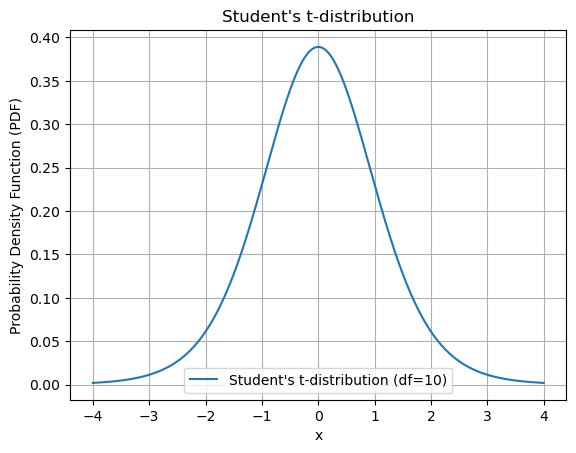

In [3]:
###9)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Set the degrees of freedom
degrees_of_freedom = 10

# Generate x values (range of t-distribution)
x_values = np.linspace(-4, 4, 1000)

# Calculate the probability density function (PDF) for each x value
pdf_values = t.pdf(x_values, df=degrees_of_freedom)

# Plot the t-distribution
plt.plot(x_values, pdf_values, label=f'Student\'s t-distribution (df={degrees_of_freedom})')
plt.title('Student\'s t-distribution')
plt.xlabel('x')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
###10)
import numpy as np
from scipy.stats import ttest_ind

def two_sample_t_test(sample1, sample2):
    """
    Perform a two-sample t-test for independent samples.

    Parameters:
    - sample1: First sample data (numpy array or list).
    - sample2: Second sample data (numpy array or list).

    Returns:
    - t_statistic: The calculated t-statistic.
    - p_value: The two-tailed p-value.
    """
    t_statistic, p_value = ttest_ind(sample1, sample2)
    return t_statistic, p_value

# Example usage:
# Replace these samples with your actual data
sample1 = np.array([25, 30, 35, 40, 45])
sample2 = np.array([20, 28, 32, 38, 42])

t_statistic, p_value = two_sample_t_test(sample1, sample2)

# Display results
print("Two-Sample T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is significant evidence that the population means are different.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to suggest a difference in population means.")


Two-Sample T-Test Results:
T-Statistic: 0.5741692517632145
P-Value: 0.5816333668955778
Fail to reject the null hypothesis: There is not enough evidence to suggest a difference in population means.


In [5]:
###13)
import scipy.stats as stats
import math

# Given data
sample_mean = 500  # in dollars
sample_std_dev = 50  # in dollars
sample_size = 50

# Calculate the critical value for a 95% confidence interval
confidence_level = 0.95
degrees_of_freedom = sample_size - 1
critical_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

# Calculate the margin of error
margin_of_error = critical_value * (sample_std_dev / math.sqrt(sample_size))

# Calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Display the results
print(f"95% Confidence Interval for Population Mean Revenue: ${lower_bound:.2f} to ${upper_bound:.2f}")


95% Confidence Interval for Population Mean Revenue: $485.79 to $514.21


In [6]:
###14)
import scipy.stats as stats
import math

# Given data
sample_mean = 8  # mmHg
hypothesized_mean = 10  # mmHg (null hypothesis)
sample_std_dev = 3  # mmHg
sample_size = 100

# Calculate the t-statistic
t_statistic = (sample_mean - hypothesized_mean) / (sample_std_dev / math.sqrt(sample_size))

# Calculate the degrees of freedom
degrees_of_freedom = sample_size - 1

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), degrees_of_freedom))

# Set the significance level
alpha = 0.05

# Test the hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: The mean decrease in blood pressure is significantly different from 10 mmHg.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to suggest a significant difference in mean decrease.")
    
# Display the results
print(f"t-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")


Reject the null hypothesis: The mean decrease in blood pressure is significantly different from 10 mmHg.
t-Statistic: -6.6667
P-Value: 0.0000


In [7]:
###15)
import scipy.stats as stats
import math

# Given data
sample_mean = 4.8  # pounds
hypothesized_mean = 5  # pounds (null hypothesis)
sample_std_dev = 0.5  # pounds
sample_size = 25

# Calculate the t-statistic
t_statistic = (sample_mean - hypothesized_mean) / (sample_std_dev / math.sqrt(sample_size))

# Calculate the degrees of freedom
degrees_of_freedom = sample_size - 1

# Calculate the p-value for a one-tailed test
p_value = stats.t.cdf(t_statistic, degrees_of_freedom)

# Set the significance level
alpha = 0.01

# Test the hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: The true mean weight is significantly less than 5 pounds.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to suggest a significant difference in mean weight.")
    
# Display the results
print(f"t-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")


Fail to reject the null hypothesis: There is not enough evidence to suggest a significant difference in mean weight.
t-Statistic: -2.0000
P-Value: 0.0285


In [8]:
###16(
import scipy.stats as stats
import math

# Given data for Group 1
sample_mean1 = 80  # group 1 mean score
sample_std_dev1 = 10  # group 1 standard deviation
sample_size1 = 30  # group 1 sample size

# Given data for Group 2
sample_mean2 = 75  # group 2 mean score
sample_std_dev2 = 8  # group 2 standard deviation
sample_size2 = 40  # group 2 sample size

# Calculate the degrees of freedom
degrees_of_freedom = sample_size1 + sample_size2 - 2

# Calculate the pooled standard deviation
pooled_std_dev = math.sqrt(((sample_size1 - 1) * sample_std_dev1**2 + (sample_size2 - 1) * sample_std_dev2**2) / degrees_of_freedom)

# Calculate the t-statistic
t_statistic = (sample_mean1 - sample_mean2) / (pooled_std_dev * math.sqrt(1/sample_size1 + 1/sample_size2))

# Calculate the two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), degrees_of_freedom))

# Set the significance level
alpha = 0.01

# Test the hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: The population means for the two groups are significantly different.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to suggest a significant difference in population means.")
    
# Display the results
print(f"t-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")


Fail to reject the null hypothesis: There is not enough evidence to suggest a significant difference in population means.
t-Statistic: 2.3240
P-Value: 0.0231


In [9]:
###17)
import scipy.stats as stats
import math

# Given data
sample_mean = 4
sample_std_dev = 1.5
sample_size = 50

# Calculate the critical value for a 99% confidence interval
confidence_level = 0.99
degrees_of_freedom = sample_size - 1
critical_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

# Calculate the margin of error
margin_of_error = critical_value * (sample_std_dev / math.sqrt(sample_size))

# Calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Display the results
print(f"99% Confidence Interval for Population Mean: {lower_bound:.4f} to {upper_bound:.4f}")



99% Confidence Interval for Population Mean: 3.4315 to 4.5685
